# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.009460e+01     7.706276e+00
 * time: 0.0027840137481689453
     1     2.744538e+01     4.027186e+00
 * time: 0.008659124374389648
     2     1.938689e+01     4.638372e+00
 * time: 0.017153024673461914
     3     1.233285e+01     2.269574e+00
 * time: 0.023372173309326172
     4     1.042992e+01     1.206233e+00
 * time: 0.027961015701293945
     5     9.694192e+00     1.722182e+00
 * time: 0.031703948974609375
     6     9.270613e+00     1.082619e+00
 * time: 0.03540515899658203
     7     8.953394e+00     1.019025e+00
 * time: 0.039160966873168945
     8     8.705104e+00     8.232451e-01
 * time: 0.04325294494628906
     9     8.428183e+00     6.046032e-01
 * time: 0.09750914573669434
    10     8.231870e+00     5.627763e-01
 * time: 0.10174298286437988
    11     8.091620e+00     5.751824e-01
 * time: 0.10567617416381836
    12     7.979155e+00     3.748334e-01
 * time: 0.10926198959350586
    13     7.973023e+00     6.037469e-01


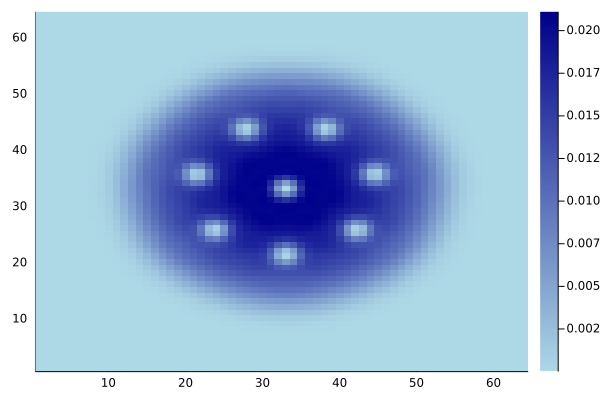

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)